In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#from scipy.interpolate import UnivariateSpline
from scipy.integrate import quad
from scipy.stats import norm
from pandas import DataFrame
import numpy as np
from numpy import trapz
from scipy.integrate import simps
from argparse import ArgumentParser
from os import path
import os.path as osp
#!pip install PeakUtils
#!pip install msgpack
#!pip install --upgrade pip
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages
#!pip install tabulate
import tabulate

from matplotlib.ticker import FixedLocator, FixedFormatter


#Use only the follwong data file
# ../../Data/latestData/ColitisSampDataD0_D3_D7/

In [2]:
def graph(path):
    f1_path = osp.abspath("file3.xlsx")   
   
    
    f1 = pd.read_excel(f1_path)  # for excel file
   
    
    # filtering data from 900 - 1800
    
    filtered1=f1[f1[f1.columns.values[0]] >=900]
    filtered1=filtered1[filtered1[filtered1.columns.values[0]] <=1800]
    print(filtered1)
    
    #filter Amide I data
    AmideI=f1[f1[f1.columns.values[0]] >=1600]
    AmideI=AmideI[AmideI[AmideI.columns.values[0]] <=1700]
    #print("AmideI is", AmideI)
    #filter Amide II data
    AmideII=f1[f1[f1.columns.values[0]] >=1480]
    AmideII=AmideII[AmideII[AmideII.columns.values[0]] <=1580]
   # print("AmideII is",AmideII)
    #filter Amide III data
    AmideIII=f1[f1[f1.columns.values[0]] >=1220]
    AmideIII=AmideIII[AmideIII[AmideIII.columns.values[0]] <=1300]
    #print("AmideIII is",AmideIII)
    
    #Filter columns using part of the name of headings
    #.columns[1:] first row
    
    conDatHeading= [col for col in filtered1.columns[2:] if 'CN' in col]
    conDat=filtered1[[*conDatHeading]]
    
    CcDatHeading= [col for col in filtered1.columns[1:] if 'CC' in col]
    CcDat=filtered1[[*CcDatHeading]]
    
      
   # print ("Condat is ", conDat)
    
    #axis=1 = take average of rows, axis=0 => take average of columns
    conDatAvg=conDat.apply(lambda x: np.average(x.values),axis=1)
    #print(conDatAvg)
    #################################################################################### 
    plt.rcParams.update(({'font.size': 16}))      
    fig1, MnMxplt1=plt.subplots(figsize=(15,10), linewidth=.01)
    fig2, CCAmdIplt=plt.subplots(figsize=(15,10), linewidth=.01)
    fig3, CCAmdIIplt=plt.subplots(figsize=(15,10), linewidth=.01)
    
    
    
    #calculating p-value
    #need to use the "equal_var=False" since Hemendra used "Two sample unequal variance"
    #tVal,pVal= stats.ttest_ind(datS2D0,datS2D7,equal_var=False)
   # print("tVal  ", tVal)
   # print("pVal  ", pVal)
    
    
    #storing area values under the curve
    CCAmideIdII=[] #BC Amide I divided by II
        
    CNAmideIdII=[] #CN Amide I divided by II
    
    CCAmideIIdIII=[] #BC Amide II divided by III
        
    CNAmideIIdIII=[] #CN Amide II divided by III
    
        
    CCAmideI=[] 
    CCAmideII=[] 
    CCAmideIII=[] 
        
    CNAmideI=[] 
    CNAmideII=[]
    CNAmideIII=[]
#for file 1

#f1_path = osp.abspath('file1.xlsx') 
#f1 = pd.read_excel(f1_path)  # for excel file
#filtered1=f1[f1[f1.columns.values[0]] >=900]
#filtered1=filtered1[filtered1[filtered1.columns.values[0]] <=1800]

    for col in filtered1.columns[1:]:
        datSm = filtered1[col]
        datSmMax = max(datSm)
        datSmMin = min(datSm)
        
        MnMxplt1.plot(filtered1[filtered1.columns[0]], datSm, label=col) # Already Min-Max Normalized data
        #MnMxplt1.plot(filtered1[filtered1.columns[0]], Nor(datSm,datSmMax,datSmMin), label=col) # To do Min-Max Normalize
        if 'CC' in col:
            
            CCAmdIplt.plot(AmideI[AmideI.columns[0]], AmideI[col], label=col) # Already Min-Max Normalized data
            #BCAmdIplt.plot(AmideIII[AmideIII.columns[0]], AmideIII[col], label=col) # Already Min-Max Normalized data
            #print('Amide I = ' + col, simps(AmideI[col], AmideI[AmideI.columns[0]]))
            #print(AmideI[col])
            #print(AmideI[AmideI.columns[0]])
            #print(abs(simps(AmideI[col], AmideI[AmideI.columns[0]])))
            AmideICC=abs(simps(AmideI[col], AmideI[AmideI.columns[0]]))
            CCAmideI.append(AmideICC)
            
            CCAmdIIplt.plot(AmideII[AmideII.columns[0]], AmideII[col], label=col) # Already Min-Max Normalized data
            #print('Amide II = ' + col, simps(AmideII[col], AmideII[AmideII.columns[0]]))
            AmideIICC=abs(simps(AmideII[col], AmideII[AmideII.columns[0]]))
            #BCAmideIdII.append(AmideIBC/AmideIIBC)
            CCAmideII.append(AmideIICC)
            
            AmideIIICC=abs(simps(AmideIII[col], AmideIII[AmideIII.columns[0]]))
            #BCAmideIIdIII.append(AmideIIBC/AmideIIIBC)
            CCAmideIII.append(AmideIIICC)
            
           
        if 'CN' in col:
                        
            AmideICN=abs(simps(AmideI[col], AmideI[AmideI.columns[0]]))
            CNAmideI.append(AmideICN)
                       
            AmideIICN=abs(simps(AmideII[col], AmideII[AmideII.columns[0]]))
            CNAmideIdII.append(AmideICN/AmideIICN)
            CNAmideII.append(AmideIICN)
            
            AmideIIICN=abs(simps(AmideIII[col], AmideIII[AmideIII.columns[0]]))
            CNAmideIIdIII.append(AmideIICN/AmideIIICN)
            CNAmideIII.append(AmideIIICN)
            
    #print("CCAmideI is", CCAmideI)
 #AmdRatio(CNAmideIdII,BCAmideIdII,CNAmideIIdIII,BCAmideIIdIII)
    #AmdRatio(CNAmideI,CNAmideII, CNAmideIII, BCAmideI,BCAmideII,BCAmideIII)
   
    #pdfFile =PdfPages("output.pdf")
    xx= np.average(AmideICC)   
    MnMxplt1.set_xlabel("Wavenumber ($cm^{-1}$)")
    MnMxplt1.set_ylabel("Absorbance")
    fig1.suptitle("All data")
    MnMxplt1.legend()
    MnMxplt1.invert_xaxis()
    flname = osp.basename("file3.xslx").split(".")[0]
   # flname =flname.split("_")[1]
    #fig1.savefig(f'All_data_User1_{flname}.png')
    fig1.savefig('all_dataLL.png')
    #plt.savefig('books_read.png')
    
    
    CCAmdIplt.set_xlabel("Wavenumber ($cm^{-1}$)")
    CCAmdIplt.set_ylabel("Absorbance")
    fig2.suptitle("Amide I - LL")
    CCAmdIplt.legend()
    CCAmdIplt.invert_xaxis()
    fig2.savefig('AmideILL.png')
    
    CCAmdIIplt.set_xlabel("Wavenumber ($cm^{-1}$)")
    CCAmdIIplt.set_ylabel("Absorbance")
    fig3.suptitle("Amide II - LL")
    CCAmdIIplt.legend()
    CCAmdIIplt.invert_xaxis()
    fig3.savefig('AmideIILL.png')
    flname = osp.basename("file3.xslx").split(".")[0]
    
    #pdfFile.close()
    plt.show()
    plt.clf()
    #plotPval(filtered1,conDat,BcDat)
    
    #plt.show()
      #, equ
    
    


     Unnamed: 0       CN1       CN2       CN3       CN4       CN5       CN6  \
0    1799.70672  0.008600  0.012161  0.001103  0.000606  0.001595  0.016336   
1    1797.77777  0.003921  0.009218  0.005661  0.000000  0.000696  0.011797   
2    1795.84883  0.000752  0.004321  0.011315  0.001150  0.001034  0.007331   
3    1793.91988  0.000000  0.000000  0.010340  0.002695  0.002171  0.002353   
4    1791.99093  0.001831  0.000067  0.004798  0.005168  0.001836  0.000000   
..          ...       ...       ...       ...       ...       ...       ...   
462   908.53362  0.138779  0.131355  0.142637  0.144644  0.132024  0.132735   
463   906.60467  0.136673  0.134435  0.144665  0.147247  0.135517  0.133722   
464   904.67572  0.136503  0.137140  0.144833  0.148731  0.137819  0.136560   
465   902.74678  0.138143  0.135127  0.141154  0.150533  0.138763  0.140245   
466   900.81783  0.140058  0.132989  0.138193  0.152251  0.138367  0.143314   

          CN7       CN8       CN9  ...      CN27   

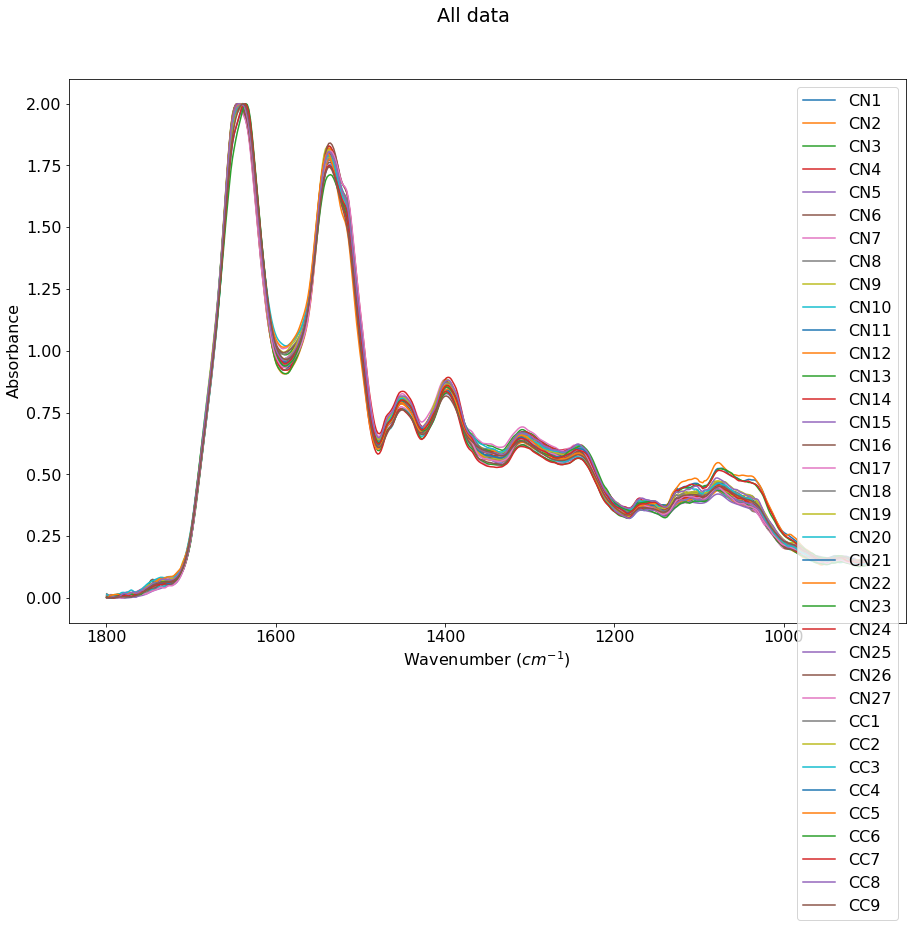

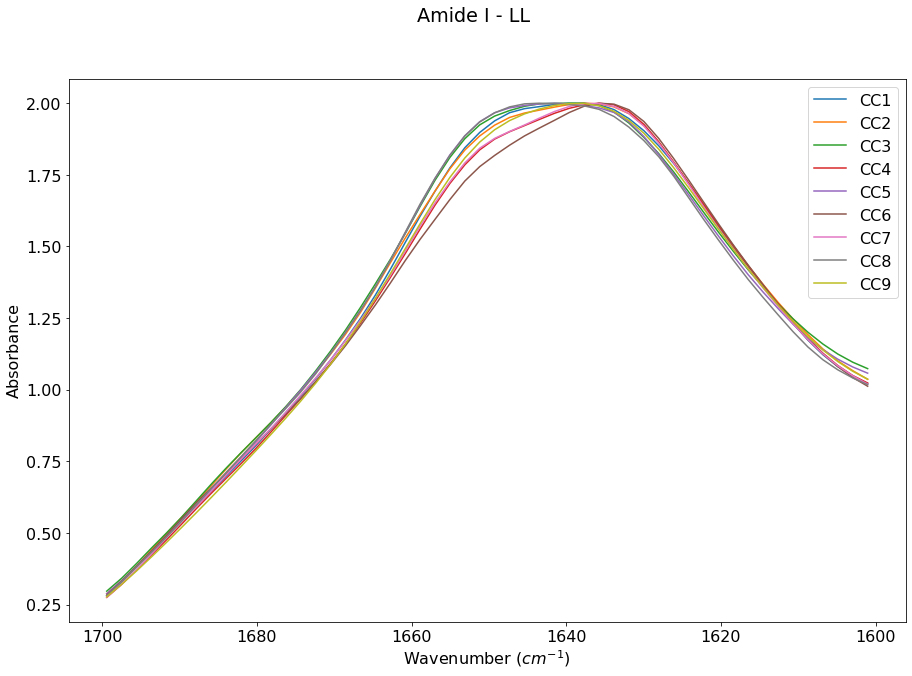

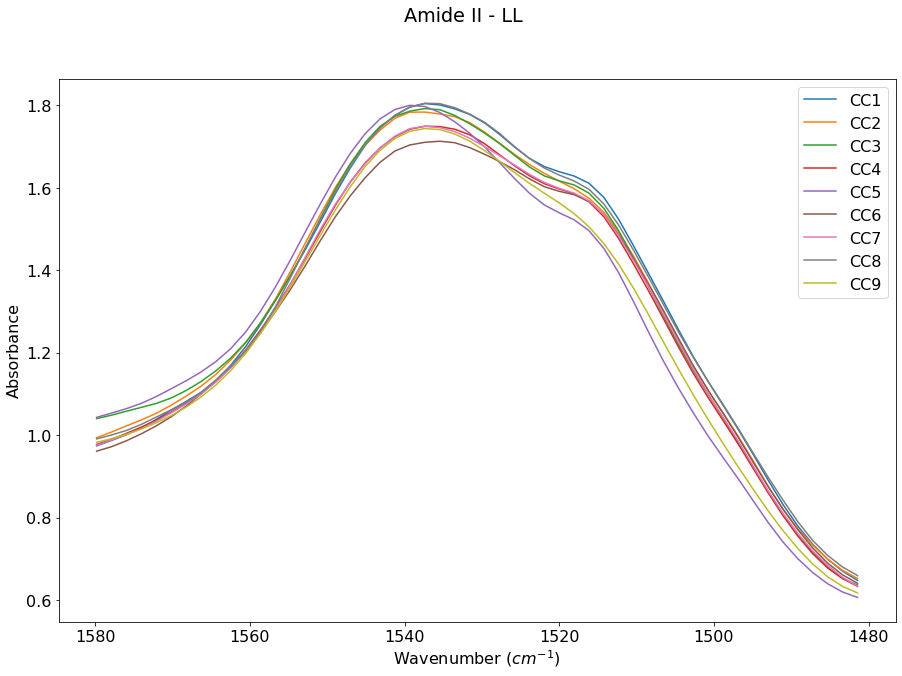

<Figure size 432x288 with 0 Axes>

In [3]:
graph(path)


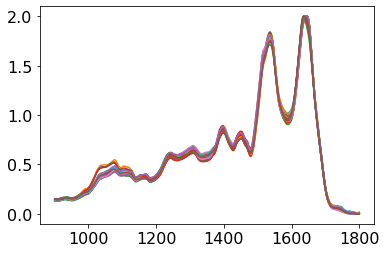

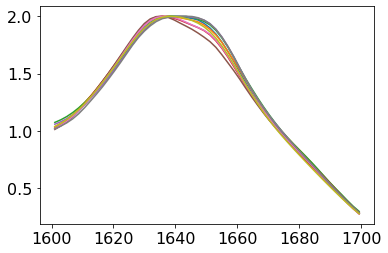

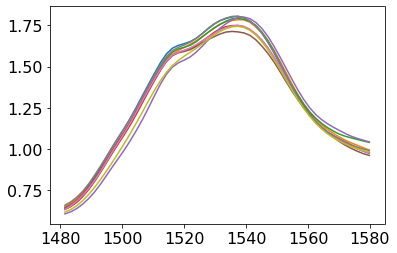

In [4]:
    f1_path = osp.abspath("file3.xlsx")   
   
    
    f1 = pd.read_excel(f1_path)  # for excel file
   
    
    # filtering data from 900 - 1800
    
    filtered1=f1[f1[f1.columns.values[0]] >=900]
    filtered1=filtered1[filtered1[filtered1.columns.values[0]] <=1800]
    
    #filter Amide I data
    AmideI=f1[f1[f1.columns.values[0]] >=1600]
    AmideI=AmideI[AmideI[AmideI.columns.values[0]] <=1700]
    
    #filter Amide II data
    AmideII=f1[f1[f1.columns.values[0]] >=1480]
    AmideII=AmideII[AmideII[AmideII.columns.values[0]] <=1580]
    
    #filter Amide III data
    AmideIII=f1[f1[f1.columns.values[0]] >=1220]
    AmideIII=AmideIII[AmideIII[AmideIII.columns.values[0]] <=1300]
    
    
    #Filter columns using part of the name of headings
    #.columns[1:] first row
    
    conDatHeading= [col for col in filtered1.columns[1:] if 'CN' in col]
    conDat=filtered1[[*conDatHeading]]
    
    CcDatHeading= [col for col in filtered1.columns[1:] if 'CC' in col]
    CcDat=filtered1[[*CcDatHeading]]
    
      
   # print ("Condat is ", conDat)
    
    #axis=1 = take average of rows, axis=0 => take average of columns
    conDatAvg=conDat.apply(lambda x: np.average(x.values),axis=1)
    #print(conDatAvg)
    #################################################################################### 
        
    fig1, MnMxplt1=plt.subplots()
    fig2, CCAmdIplt=plt.subplots()
    fig3, CCAmdIIplt=plt.subplots()
    
    
    
    #calculating p-value
    #need to use the "equal_var=False" since Hemendra used "Two sample unequal variance"
    #tVal,pVal= stats.ttest_ind(datS2D0,datS2D7,equal_var=False)
   # print("tVal  ", tVal)
   # print("pVal  ", pVal)
    
    
    #storing area values under the curve
    CCAmideIdII=[] #BC Amide I divided by II
        
    CNAmideIdII=[] #CN Amide I divided by II
    
    CCAmideIIdIII=[] #BC Amide II divided by III
        
    CNAmideIIdIII=[] #CN Amide II divided by III
    
        
    CCAmideI=[] 
    CCAmideII=[] 
    CCAmideIII=[] 
        
    CNAmideI=[] 
    CNAmideII=[]
    CNAmideIII=[]
#for file 1

#f1_path = osp.abspath('file1.xlsx') 
#f1 = pd.read_excel(f1_path)  # for excel file
#filtered1=f1[f1[f1.columns.values[0]] >=900]
#filtered1=filtered1[filtered1[filtered1.columns.values[0]] <=1800]

    for col in filtered1.columns[1:]:
        datSm = filtered1[col]
        datSmMax = max(datSm)
        datSmMin = min(datSm)
        
        MnMxplt1.plot(filtered1[filtered1.columns[0]], datSm, label=col) # Already Min-Max Normalized data
        #MnMxplt1.plot(filtered1[filtered1.columns[0]], Nor(datSm,datSmMax,datSmMin), label=col) # To do Min-Max Normalize
        if 'CC' in col:
            
            CCAmdIplt.plot(AmideI[AmideI.columns[0]], AmideI[col], label=col) # Already Min-Max Normalized data
            #BCAmdIplt.plot(AmideIII[AmideIII.columns[0]], AmideIII[col], label=col) # Already Min-Max Normalized data
            #print('Amide I = ' + col, simps(AmideI[col], AmideI[AmideI.columns[0]]))
            #print(AmideI[col])
            #print(AmideI[AmideI.columns[0]])
            #print(abs(simps(AmideI[col], AmideI[AmideI.columns[0]])))
            AmideICC=abs(simps(AmideI[col], AmideI[AmideI.columns[0]]))
            CCAmideI.append(AmideICC)
            
            CCAmdIIplt.plot(AmideII[AmideII.columns[0]], AmideII[col], label=col) # Already Min-Max Normalized data
            #print('Amide II = ' + col, simps(AmideII[col], AmideII[AmideII.columns[0]]))
            AmideIICC=abs(simps(AmideII[col], AmideII[AmideII.columns[0]]))
            #BCAmideIdII.append(AmideIBC/AmideIIBC)
            CCAmideII.append(AmideIICC)
            
            AmideIIICC=abs(simps(AmideIII[col], AmideIII[AmideIII.columns[0]]))
            #BCAmideIIdIII.append(AmideIIBC/AmideIIIBC)
            CCAmideIII.append(AmideIIICC)
            
           
        if 'CN' in col:
                        
            AmideICN=abs(simps(AmideI[col], AmideI[AmideI.columns[0]]))
            CNAmideI.append(AmideICN)
                       
            AmideIICN=abs(simps(AmideII[col], AmideII[AmideII.columns[0]]))
            CNAmideIdII.append(AmideICN/AmideIICN)
            CNAmideII.append(AmideIICN)
            
            AmideIIICN=abs(simps(AmideIII[col], AmideIII[AmideIII.columns[0]]))
            CNAmideIIdIII.append(AmideIICN/AmideIIICN)
            CNAmideIII.append(AmideIIICN)
            
    #print("CCAmideI is", CCAmideI)

In [5]:

    ##########################################################################################
    
    #Min Max normalization
def Nor(i, datMx,datMn):
        return 2*(i-datMn)/(datMx - datMn)


def AmdRatio(CNAmideI,CNAmideII, CNAmideIII, CCAmideI,CCAmideII,CCAmideIII):
        t, p= stats.ttest_ind(CNAmideI,CNAmideII, equal_var=False)
        print('CN AmideI / CN AmideII ', p)
    
        '''
        t1, p1= stats.ttest_ind(CNAmideIIdIII,CCAmideIIdIII, equal_var=False)
        print('AmideII / AmideIII ', p1)
        '''
    
        t1, p1= stats.ttest_ind(CNAmideII,CNAmideIII, equal_var=False)
        print('CC AmideII / CC AmideIII ', p1)
    
        t2, p2= stats.ttest_ind(CCAmideI,CCAmideII, equal_var=False)
        print('CC AmideI / BC AmideII ', p2)
    
        t3, p3= stats.ttest_ind(CCAmideII,CCAmideIII, equal_var=False)
        print('CC AmideII / CC AmideIII ', p3)
    
    
    

In [6]:
#Nor(2,datMx,datMn)
AmdRatio(CNAmideI,CNAmideII, CNAmideIII, CCAmideI,CCAmideII,CCAmideIII)

CN AmideI / CN AmideII  0.016644719709031117
CC AmideII / CC AmideIII  1.5182526260013385e-70
CC AmideI / BC AmideII  0.004661534020244347
CC AmideII / CC AmideIII  1.5400165874019137e-19


In [7]:
#BioM(CNBCp,filtered1)

In [8]:
conDatHeading= [col for col in filtered1.columns[1:] if 'CN' in col]
conDat=filtered1[[*conDatHeading]]
    
CcDatHeading= [col for col in filtered1.columns[1:] if 'CC' in col]
CcDat=filtered1[[*CcDatHeading]]

In [9]:
def calP(conDat,CcDat):
    '''
    calculates both P and T
    '''
    CNcolnames = conDat.columns
    CNnum = len(CNcolnames)
    CNa, CNb = CNcolnames[:CNnum//2], CNcolnames[CNnum//2:]
    CNtVal, CNpVal= stats.ttest_ind(conDat[[*CNa]].values, conDat[[*CNb]].values, equal_var=False, axis=1)
    
    CCcolnames = CcDat.columns
    CCnum = len(CCcolnames)
    CCa, CCb = CCcolnames[:CCnum//2], CCcolnames[CCnum//2:]
    CCtVal, CCpVal= stats.ttest_ind(CcDat[[*CCa]].values, CcDat[[*CCb]].values, equal_var=False, axis=1)
    
    
    CNCCtVal, CNCCpVal= stats.ttest_ind(conDat[[*CNcolnames]].values, CcDat[[*CCcolnames]].values, equal_var=False, axis=1)
    
    
    
    
    
    #pVal = conDat.apply(lambda x: stats.ttest_ind(x[:5], x[5:], equal_var=False)[1], axis=1)
    
    return CNtVal, CNpVal, CCtVal, CCpVal , CNCCtVal, CNCCpVal

def calP2():
    a,b=[col for col in filtered1.columns[1:] if 'CC' in col], [col for col in filtered1.columns[1:] if 'CN' in col]
    

    

In [10]:
def plotPval(filtered1,conDat,CcDat):
    fig4, pValCNplt=plt.subplots()
    #this is to draw 5% line in the P-value plot
    FivePerc=[]
    for xx in filtered1[filtered1.columns[0]]:
        FivePerc.append(0.05)
        
    CNt, CNp, CCt, CCp, CNCCt, CNCCp  = calP(conDat,CcDat)
    pValCNplt.plot(filtered1[filtered1.columns[0]], CNp)
    pValCNplt.plot(filtered1[filtered1.columns[0]], FivePerc,'k-')
    
    y_formatter = FixedFormatter(["0.05","0","0.2","0.4","0.6","0.8","1.0"])
    y_locator = FixedLocator([0.05,0.0,0.2,0.4,0.6,0.8,1.0])
    pValCNplt.yaxis.set_major_formatter(y_formatter)
    pValCNplt.yaxis.set_major_locator(y_locator)

    pValCNplt.set_xlabel("Wavenumber ($cm^{-1}$)")
    pValCNplt.set_ylabel("P-values")
    pValCNplt.invert_xaxis()
    fig4.suptitle("Control - P-values")
    #pValCNplt.savefig('short.png')
    fig4.savefig('ControlLPVal.png')
    
    
    
    fig5, pValCCplt=plt.subplots()
    
        
    pValCCplt.plot(filtered1[filtered1.columns[0]], CCp,'r-')
    pValCCplt.plot(filtered1[filtered1.columns[0]], FivePerc,'k-')
    
    
    #getting cordinates if p<=0.05
    for ele in CCp:
        ind=np.where(CCp <=0.05)
    for ele in ind:
        print("Significant PVlues:", CCp[ele])
        print("PVAL is Lower than .05 at wavelengths:", filtered1[filtered1.columns[0]].values[ele])
       # print(len(CCp[ele]))
        #print(len(filtered1[filtered1.columns[0]].values[ele]))
        
   #  q=plt.plot(filtered1[filtered1.columns[0]].values[ele],CCp[ele])
    # plt.show(q)
       # table= [['PValue', 'Wavelength'], [ind, filtered1[filtered1.columns[0]].values[ele] ]]
        #print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))
    
    
   # y_formatter = FixedFormatter(["0.05","0","0.2","0.4","0.6","0.8","1.0"])
   # y_locator = FixedLocator([0.05,0.0,0.2,0.4,0.6,0.8,1.0])
    pValCCplt.yaxis.set_major_formatter(y_formatter)
    pValCCplt.yaxis.set_major_locator(y_locator)

    pValCCplt.set_xlabel("Wavenumber ($cm^{-1}$)")
    pValCCplt.set_ylabel("P-values")
   # pValCCplt.text(1400,0.5, "P-Values <=0.05", color='green')
   # pValCCplt.text(1400,0.4, "1529 - 1539", color='green')
   # pValCCplt.text(1400,0.4, "1547 - 1554", color='green')
   # pValCCplt.text(1400,0.3, "1658 - 1670", color='green')
   # pValCCplt.text(1400,0.2, "1709", color='green')
   # pValCCplt.text(1400,0.2, "1747", color='green')
    pValCCplt.invert_xaxis()
    fig5.suptitle("Lymphoma - P-values")
    plt.savefig("L_PVAL.jpg")
    
    
    fig6, pValCNCCplt=plt.subplots(figsize=(15,10), linewidth=.01)
    
    #getting cordinates if p<=0.05
    for ele in CNCCp:
        ind=np.where(CNCCp <=0.05)
    for ele in ind:
        print("Significant PValues:", CNCCp[ele])
        print("PVAL is Lower than .05 at wavelengths:", filtered1[filtered1.columns[0]].values[ele])
    
        
    pValCNCCplt.plot(filtered1[filtered1.columns[0]], CNCCp,'g-')
    pValCNCCplt.plot(filtered1[filtered1.columns[0]], FivePerc,'k-')
    
    
    pValCNCCplt.yaxis.set_major_formatter(y_formatter)
    pValCNCCplt.yaxis.set_major_locator(y_locator)

    pValCNCCplt.set_xlabel("Wavenumber ($cm^{-1}$)")
    pValCNCCplt.set_ylabel("P-values")
    pValCNCCplt.set_xlim([900,1800])
    pValCNCCplt.set_ylim([0,0.2])
    pValCNCCplt.text(1100,1, "P-Values <=0.05", color='green')
    pValCNCCplt.text(1100,0.95, "1710 - 1676", color='red')
    pValCNCCplt.text(1100,0.9, "1656 - 1645", color='red')
    pValCNCCplt.text(1100,0.85, "1637 - 15951", color='red')
    pValCNCCplt.text(1100,0.8, "1568 - 1556", color='red')
    pValCNCCplt.text(1100,0.75, "1537 - 1529", color='red')
    pValCNCCplt.text(1100,0.7, "1379 - 1319", color='red')
    pValCNCCplt.text(1100,0.65, "1236 - 1190", color='red')
    pValCNCCplt.text(1100,0.6, "1182", color='red')
    pValCNCCplt.text(1100,0.55, "1165 - 1159", color='red')
    pValCNCCplt.invert_xaxis()
    fig6.suptitle("Control and Lymphoma - P-values")
    fig6.savefig('ControlLLPVal.png')
    
    

<ipython-input-10-84f6397f439a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  pValCNplt.yaxis.set_major_formatter(y_formatter)
<ipython-input-10-84f6397f439a>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  pValCCplt.yaxis.set_major_formatter(y_formatter)


Significant PVlues: []
PVAL is Lower than .05 at wavelengths: []
Significant PValues: [4.06612040e-02 3.44695126e-02 2.98774944e-02 2.42138731e-02
 1.11892459e-02 2.16764735e-03 1.68787985e-04 1.71888415e-05
 2.54504364e-05 1.24576834e-04 4.93450398e-04 1.68179382e-03
 4.40725584e-03 8.71778344e-03 1.48774397e-02 2.56757759e-02
 3.62788006e-02 3.67983136e-02 4.60116904e-02 4.73112882e-02
 3.67856699e-02 2.87192758e-02 2.33489215e-02 2.31936644e-02
 2.74299661e-02 3.48177573e-02 1.83008941e-03 4.68341404e-05
 1.22986294e-04 4.54865102e-04 4.51099142e-04 1.83801062e-04
 9.01867989e-05 7.47238174e-05 4.67788444e-05 2.03706702e-05
 1.35302043e-05 1.28292399e-05 5.23032904e-06 1.41947050e-06
 1.93834411e-06 8.93672368e-06 4.88144788e-05 1.95951041e-04
 6.13837555e-04 1.97214222e-03 7.43240765e-03 2.38998016e-02
 4.72005222e-02 4.20476250e-02 3.13316965e-02 1.95223513e-02
 7.48041620e-03 3.56504498e-03 4.07878615e-03 1.02401592e-02
 4.59996176e-02 4.08145903e-02 2.74965491e-02 2.35759024e-02

<ipython-input-10-84f6397f439a>:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  pValCNCCplt.yaxis.set_major_formatter(y_formatter)


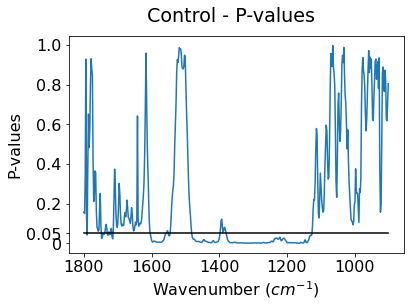

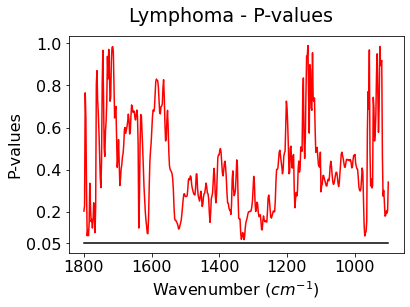

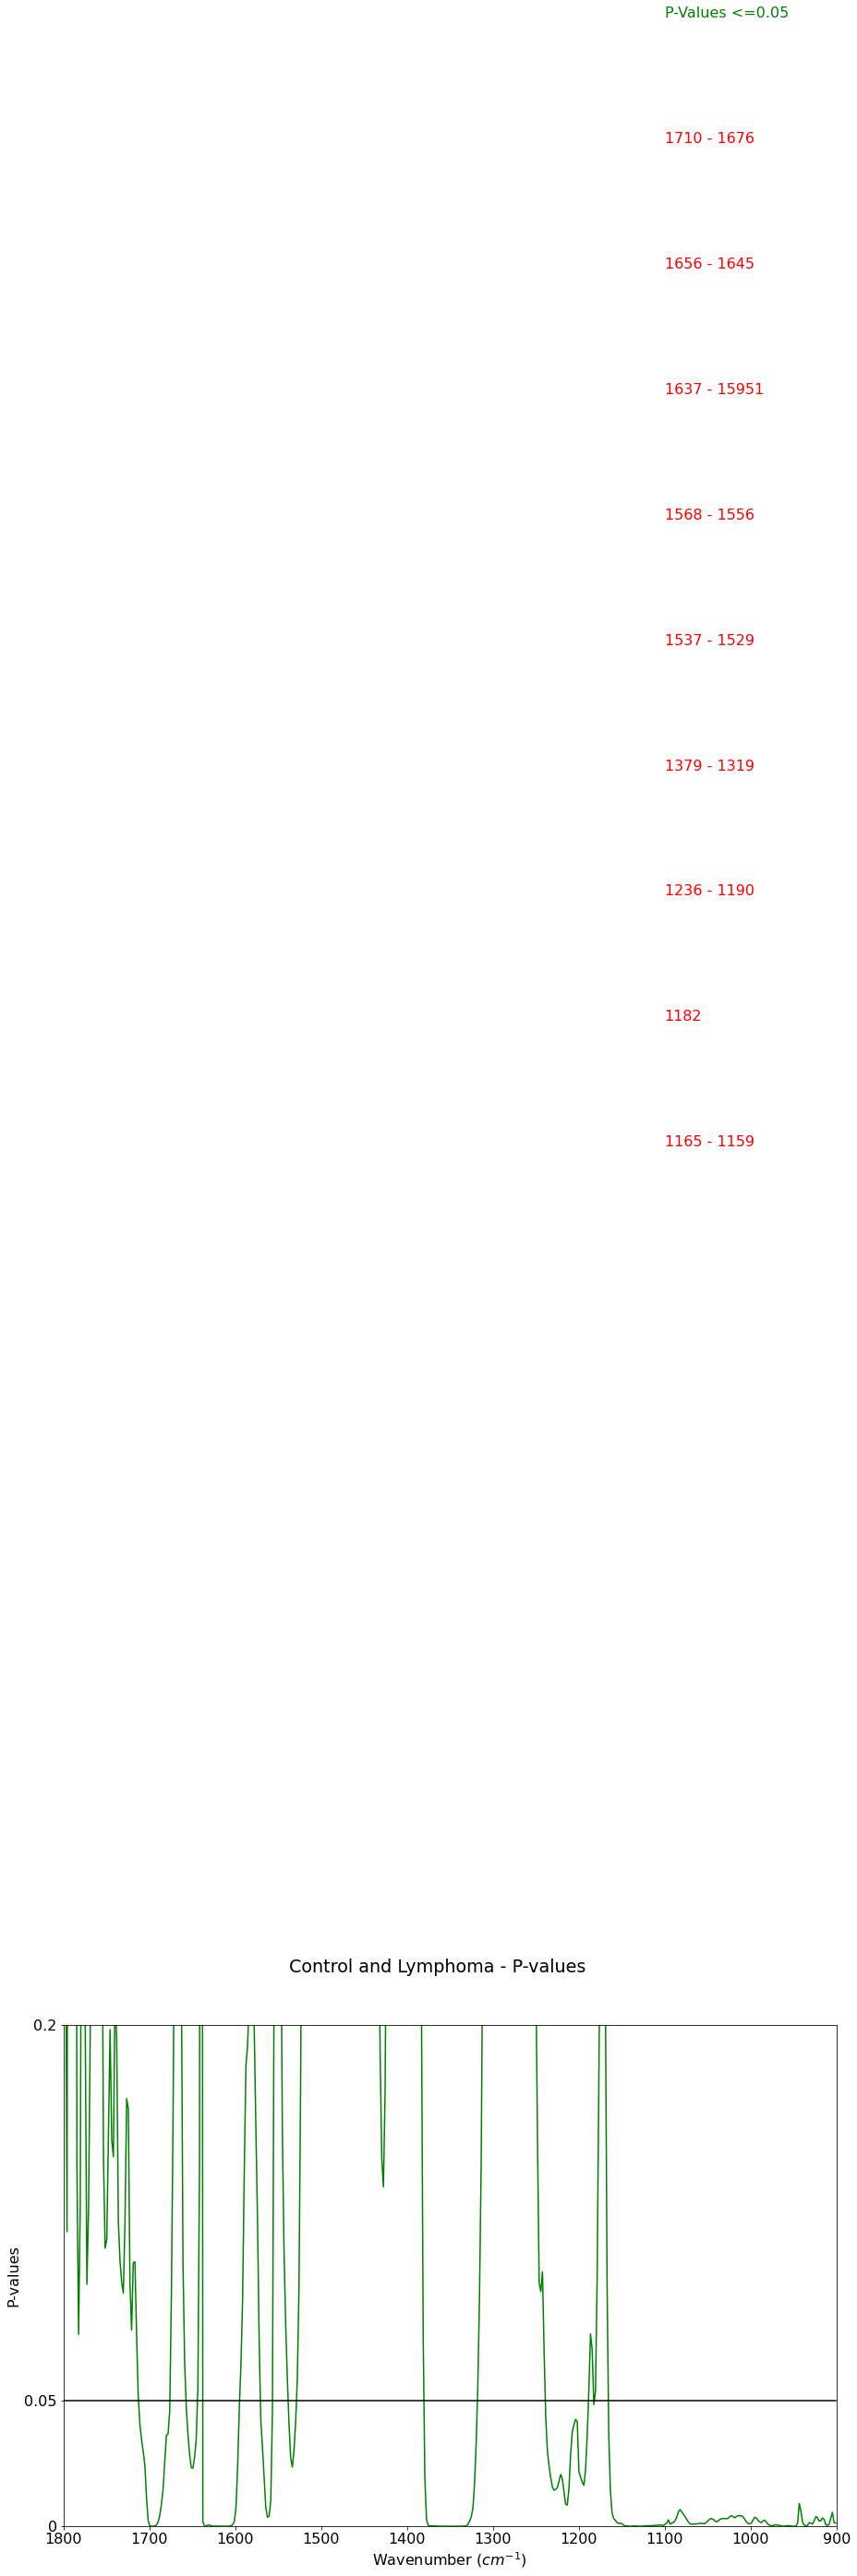

In [11]:
plotPval(filtered1,conDat,CcDat)

In [12]:
CNCCp= calP(conDat,CcDat)
#print(CNCCp)


In [13]:
def BioM(CNCCp,filtered1):
    
    '''
    #getting cordinates if p<=0.05
    for ele in CNBCp:
        ind=np.where(CNBCp <=0.05)
    for ele in ind:
        #print(CNBCp[ele])
        print(filtered1[filtered1.columns[0]].values[ele])
    '''
    
    xx = np.array(filtered1[filtered1.columns[0]])
    ind1 = np.where(np.logical_and(xx>1033, xx<1034))
    print(ind1)
    #print('I= 1033 ' , xx[ind1], CNCCp[ind1])
    
    
    ind2 = np.where(np.logical_and(xx>1076, xx<1077))
    print(ind2)
    #print('I= 1078 ',xx[ind2], CNCCp[ind])
    
BioM(CNCCp,filtered1)


(array([397], dtype=int64),)
(array([375], dtype=int64),)


In [14]:
def main():
    args = ArgumentParser()
    args.add_argument('file1.xslx', help='file one excel file')
   # args.add_argument('file3', help='file two excel file')
    opts = args.parse_args()    
    graph(opts)
    return
       

       

if __name__ == '__main__':
    main()

usage: ipykernel_launcher.py [-h] file1.xslx
ipykernel_launcher.py: error: unrecognized arguments: -f


SystemExit: 2

C:\Users\18457\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
